<a href="https://colab.research.google.com/github/SeonHyungJo/tensorflow-2.0-study/blob/master/%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_2.0_%ED%94%84%EB%A1%9C%EA%B7%B8%EB%9E%98%EB%B0%8D/Ch07_%EC%88%9C%ED%99%98_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import numpy as np

# 신경망 예측 데이터 생성
X = []
Y = []

for i in range(6):
  #  [0,1,2,3], [1,2,3,4] 같은 정수의 시퀀스를 만든다.
  lst = list(range(i,i+4))

  print('lst', lst)

  # 위에서 구한 시퀀스의 숫자들을 각각 10으로 나눈 다음 저장한다.
  # SimpleRNN에 각 타임스텝에 하나씩 숫자가 들어가기 때문에 여기서도 하나씩 분리해서 배열에 저장한다.
  X.append(list(map(lambda c: [c/10], lst)))

  # 정답에 해당하는 4,5 등의 정수 역시 앞에서처럼 10으로 나누어서 저장한다.
  Y.append((i+4)/10)

X = np.array(X)
Y = np.array(Y)
for i in range(len(X)):
  print(X[i], Y[i])

lst [0, 1, 2, 3]
lst [1, 2, 3, 4]
lst [2, 3, 4, 5]
lst [3, 4, 5, 6]
lst [4, 5, 6, 7]
lst [5, 6, 7, 8]
[[0. ]
 [0.1]
 [0.2]
 [0.3]] 0.4
[[0.1]
 [0.2]
 [0.3]
 [0.4]] 0.5
[[0.2]
 [0.3]
 [0.4]
 [0.5]] 0.6
[[0.3]
 [0.4]
 [0.5]
 [0.6]] 0.7
[[0.4]
 [0.5]
 [0.6]
 [0.7]] 0.8
[[0.5]
 [0.6]
 [0.7]
 [0.8]] 0.9


In [4]:
# 시퀀스 예측 모델 정의
model = tf.keras.Sequential([
  tf.keras.layers.SimpleRNN(units=10, return_sequences=False, input_shape=[4,1]),
  tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 10)                120       
_________________________________________________________________
dense (Dense)                (None, 1)                 11        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [5]:
# 네트워크 훈련 및 결과 확인
model.fit(X, Y, epochs=100, verbose=0)
print(model.predict(X))

[[0.35729402]
 [0.51261634]
 [0.63831216]
 [0.7341382 ]
 [0.80362856]
 [0.8517923 ]]


In [6]:
# 학습되지 않은 시퀀스에 대한 예측 결과
print(model.predict(np.array([[[0.6], [0.7], [0.8], [0.9]]])))
print(model.predict(np.array([[[-0.1], [0.0], [0.1], [0.2]]])))

[[0.88361263]]
[[0.17855123]]


In [7]:
# 곱셈 문제 데이터 생성
X = []
Y = []
for i in range(3000):
  # 0 ~ 1 범위의 랜덤한 숫자 100개를 만든다.
  lst = np.random.rand(100)

  # 마킹할 숫자 2개의 인덱스를 뽑는다.
  idx = np.random.choice(100, 2, replace=False)

  # 마킹 인덱스가 저장된 원=핫 인코딩 벡터를 만든다.
  zeros = np.zeros(100)
  zeros[idx] = 1

  # 마킹 인덱스와 랜덤한 숫자를 햡쳐서 X에 저장합니다.
  X.append(np.array(list(zip(zeros, lst)))) 
  # 마킹 인덱스가 1인 값만 서로 곱해서 Y에 저장합니다.
  Y.append(np.prod(lst[idx]))

print(X[0], Y[0])

[[0.         0.07406413]
 [0.         0.18620492]
 [0.         0.19019044]
 [0.         0.38005243]
 [0.         0.03554939]
 [0.         0.99490898]
 [0.         0.4560137 ]
 [1.         0.37330382]
 [0.         0.7916733 ]
 [0.         0.40139998]
 [0.         0.13435771]
 [0.         0.14136544]
 [0.         0.40936744]
 [0.         0.80662415]
 [0.         0.93874669]
 [0.         0.48410569]
 [0.         0.08701132]
 [0.         0.18880749]
 [0.         0.24296099]
 [0.         0.36903031]
 [0.         0.23310985]
 [0.         0.08697399]
 [0.         0.86492873]
 [0.         0.22366286]
 [0.         0.04831   ]
 [0.         0.32975171]
 [0.         0.8384756 ]
 [0.         0.67327374]
 [0.         0.15958238]
 [0.         0.5938906 ]
 [0.         0.711938  ]
 [0.         0.25506535]
 [0.         0.90858829]
 [0.         0.11533055]
 [0.         0.4241082 ]
 [0.         0.31393863]
 [0.         0.70403434]
 [0.         0.38263309]
 [0.         0.87087158]
 [0.         0.40318239]


In [8]:
# SimpleRNN  레이어를 이용한 곱셈 문제 모델 정의
model = tf.keras.Sequential([
 tf.keras.layers.SimpleRNN(units=30, return_sequences=True, input_shape=[100,2]),
 tf.keras.layers.SimpleRNN(units=30)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 100, 30)           990       
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 30)                1830      
Total params: 2,820
Trainable params: 2,820
Non-trainable params: 0
_________________________________________________________________


In [10]:
# SimpleRNN 네트워크 학습
X = np.array(X)
Y = np.array(Y)

history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Epoch 1/100
64/64 [==============================] - 9s 142ms/step - loss: 0.1300 - val_loss: 0.0658
Epoch 2/100
64/64 [==============================] - 9s 136ms/step - loss: 0.0589 - val_loss: 0.0510
Epoch 3/100
64/64 [==============================] - 9s 136ms/step - loss: 0.0536 - val_loss: 0.0495
Epoch 4/100
64/64 [==============================] - 9s 143ms/step - loss: 0.0526 - val_loss: 0.0502
Epoch 5/100
64/64 [==============================] - 9s 138ms/step - loss: 0.0528 - val_loss: 0.0482
Epoch 6/100
64/64 [==============================] - 9s 137ms/step - loss: 0.0517 - val_loss: 0.0480
Epoch 7/100
64/64 [==============================] - 9s 137ms/step - loss: 0.0515 - val_loss: 0.0480
Epoch 8/100
64/64 [==============================] - 9s 136ms/step - loss: 0.0515 - val_loss: 0.0486
Epoch 9/100
64/64 [==============================] - 9s 139ms/step - loss: 0.0516 - val_loss: 0.0477
Epoch 10/100
64/64 [==============================] - 9s 139ms/step - loss: 0.0513 - val_lo

In [9]:
# SimpleRNN 네트워크 학습 결과 확인
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'b-', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

NameError: ignored

In [13]:
# 테스트 데이터에 대한 예측 정확도 확인
model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560+5])

# 5개 테스트 데이터에 대한 예측을 표시한다.
for i in range(5):
  print(Y[2560+i], '\t'), prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i])

prediction = model.predict(X[2560:])
fail = 0
for i in range(len(prediction)):
  # 오차가 0.4 이상이면 오답이다.
  if abs(prediction[i][0] - Y[2560+i]) > 0.04:
    fail +=1
print('correnctness:', (440 - fail) / 440 * 100, '%')

14/14 [==============================] - 0s 16ms/step - loss: 0.0545
0.16001983160241762 	
0.15214741989955927 	
0.11939323465419154 	
0.21953766860824392 	
0.6947271192171183 	
correnctness: 9.545454545454547 %


In [14]:
# LSTM 레이어를 이용한 곱셈 문제 모델 정의
model = tf.keras.Sequential([
  tf.keras.layers.LSTM(units=30, return_sequences=True, input_shape=[100,2]),
  tf.keras.layers.LSTM(units=30),
  tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 30)           3960      
_________________________________________________________________
lstm_1 (LSTM)                (None, 30)                7320      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 11,311
Trainable params: 11,311
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# LSTM 네트워크 학습
X = np.array(X)
Y = np.array(Y)
history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

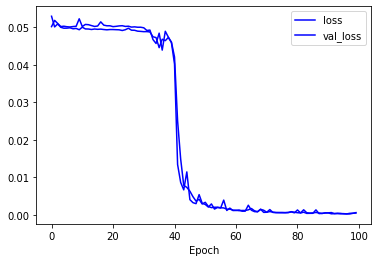

In [18]:
# LSTM 네트워크의 학습 결과 확인
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'b-', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [19]:
# 테스트 데이터에 대한 예측 정확도 확인
model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560+5])

# 5개 테스트 데이터에 대한 예측을 표시한다.
for i in range(5):
  print(Y[2560+i], '\t'), prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i])

prediction = model.predict(X[2560:])
cnt = 0
for i in range(len(prediction)):
  if abs(prediction[i][0] - Y[2560+i]) > 0.04:
    cnt +=1
print('correnctness:', (440 - cnt) / 440 * 100, '%')

14/14 [==============================] - 0s 13ms/step - loss: 5.0716e-04
0.16001983160241762 	
0.15214741989955927 	
0.11939323465419154 	
0.21953766860824392 	
0.6947271192171183 	
correnctness: 93.63636363636364 %


In [20]:
# GRU 레이어를 이용한 곱셈 문제 모델 정의
model = tf.keras.Sequential([
  tf.keras.layers.GRU(units=30, return_sequences=True, input_shape=[100,2]),
  tf.keras.layers.GRU(units=30),
  tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 100, 30)           3060      
_________________________________________________________________
gru_1 (GRU)                  (None, 30)                5580      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 8,671
Trainable params: 8,671
Non-trainable params: 0
_________________________________________________________________


In [21]:
# GRU 레이어 네트워크 학습
X = np.array(X)
Y = np.array(Y)
history = model.fit(X[:2560], Y[:2560], epochs=100, validation_split=0.2)

Epoch 1/100
64/64 [==============================] - 3s 53ms/step - loss: 0.0529 - val_loss: 0.0504
Epoch 2/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0507 - val_loss: 0.0501
Epoch 3/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0501 - val_loss: 0.0501
Epoch 4/100
64/64 [==============================] - 3s 44ms/step - loss: 0.0505 - val_loss: 0.0504
Epoch 5/100
64/64 [==============================] - 3s 44ms/step - loss: 0.0498 - val_loss: 0.0501
Epoch 6/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0498 - val_loss: 0.0504
Epoch 7/100
64/64 [==============================] - 3s 44ms/step - loss: 0.0498 - val_loss: 0.0513
Epoch 8/100
64/64 [==============================] - 3s 43ms/step - loss: 0.0496 - val_loss: 0.0502
Epoch 9/100
64/64 [==============================] - 3s 45ms/step - loss: 0.0496 - val_loss: 0.0501
Epoch 10/100
64/64 [==============================] - 3s 44ms/step - loss: 0.0494 - val_loss: 0.0506

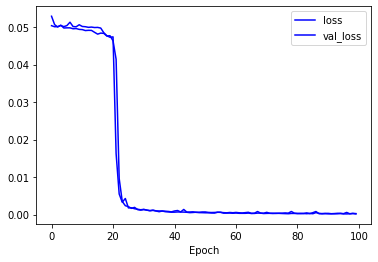

In [22]:
# GRU 레이어 네트워크의 학습 결과 확인
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'b-', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [23]:
# 테스트 데이터에 대한 예측 정확도 확인
model.evaluate(X[2560:], Y[2560:])
prediction = model.predict(X[2560:2560+5])

# 5개 테스트 데이터에 대한 예측을 표시한다.
for i in range(5):
  print(Y[2560+i], '\t'), prediction[i][0], '\tdiff:', abs(prediction[i][0] - Y[2560+i])

prediction = model.predict(X[2560:])
cnt = 0
for i in range(len(prediction)):
  if abs(prediction[i][0] - Y[2560+i]) > 0.04:
    cnt +=1
print('correnctness:', (440 - cnt) / 440 * 100, '%')

14/14 [==============================] - 0s 13ms/step - loss: 2.4414e-04
0.16001983160241762 	
0.15214741989955927 	
0.11939323465419154 	
0.21953766860824392 	
0.6947271192171183 	
correnctness: 97.72727272727273 %


# 임베딩 레이어
영화 리뷰를 통해서 긍정 부정을 판단해보자

In [30]:
# Naver Sentiment Movie Corpus v1.0 다운로드
path_to_train_file = tf.keras.utils.get_file('train.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt')
path_to_test_file = tf.keras.utils.get_file('test.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt')

4898816/4893335 [==============================] - 0s 0us/step


In [31]:
# 데이터 로드 및 확인
# 데이터를 메모리에 불러온다. 인코딩 형식으로 utf-8을 지정한다.
train_text = open(path_to_train_file, 'rb').read().decode(encoding='utf-8')
test_text = open(path_to_test_file, 'rb').read().decode(encoding='utf-8')

# 텍스트가 총 몇 자인지 확인한다.
print('Lenfth of text : {} charaters'.format(len(train_text)))
print('Lenfth of text : {} charaters'.format(len(test_text)))

# 처음 300자를 확인한다
print(train_text[:300])
print(test_text[:300])

Lenfth of text : 6937271 charaters
Lenfth of text : 2318260 charaters
id	document	label
9976970	아 더빙.. 진짜 짜증나네요 목소리	0
3819312	흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나	1
10265843	너무재밓었다그래서보는것을추천한다	0
9045019	교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정	0
6483659	사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다	1
5403919	막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.	0
7797314	원작의
id	document	label
6270596	굳 ㅋ	1
9274899	GDNTOPCLASSINTHECLUB	0
8544678	뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아	0
6825595	지루하지는 않은데 완전 막장임... 돈주고 보기에는....	0
6723715	3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??	0
7898805	음악이 주가 된, 최고의 음악영화	1
6315043	진정한 쓰레기	0
6097171	마치 미국애니에서 튀어나온듯한 창의력없는 로봇디자인부터


In [70]:
# 학습을 위한 정답 데이터(Y) 만들기
train_Y = np.array([[int(row.split('\t')[2])] for row in train_text.split('\n')[1:] if row.count('\t') > 0])
test_Y = np.array([[int(row.split('\t')[2])] for row in test_text.split('\n')[1:] if row.count('\t') > 0])

print(train_Y.shape, test_Y.shape)
print(train_Y)

(150000, 1) (50000, 1)
[[1]
 [0]
 [0]
 [0]
 [0]]


In [58]:
# 훈련 데이터의 입력(X) 정제
import re

def clean_str(string):
  string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]", " ", string)
  string = re.sub(r"\'s", " \'s", string)
  string = re.sub(r"\'ve", " \'ve", string)
  string = re.sub(r"n\'t", " n\'t" , string)
  string = re.sub(r"\'re", " \'re" , string)
  string = re.sub(r"\'d", " \'d" , string)
  string = re.sub(r"\'ll", " \'ll" , string)
  string = re.sub(r",", " , " , string)
  string = re.sub(r"!", " ! " , string)
  string = re.sub(r"\(", " \( " , string)
  string = re.sub(r"\)", " \) " , string)
  string = re.sub(r"\?", " \? " , string)
  string = re.sub(r"\s{2,}", " " , string)
  string = re.sub(r"\'{2,}", "\'" , string)
  string = re.sub(r"\'", "" , string)

  return string.lower()

train_text_X = [row.split('\t')[1] for row in train_text.split('\n')[1:] if row.count('\t') > 0]
test_text_X = [clean_str(sentence) for sentence in train_text_X]

sentences = [sentence.split(' ') for sentence in train_text_X]
for i in range(5):
  print(sentences[i])

['아', '더빙..', '진짜', '짜증나네요', '목소리']
['흠...포스터보고', '초딩영화줄....오버연기조차', '가볍지', '않구나']
['너무재밓었다그래서보는것을추천한다']
['교도소', '이야기구먼', '..솔직히', '재미는', '없다..평점', '조정']
['사이몬페그의', '익살스런', '연기가', '돋보였던', '영화!스파이더맨에서', '늙어보이기만', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


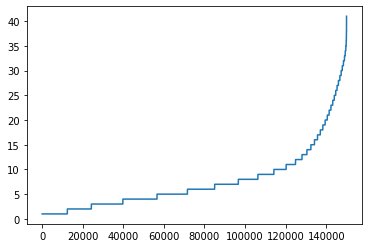

144646


In [59]:
# 각 문장의 단어 길이 확인
import matplotlib.pyplot as plt
sentence_len = [len(sentence) for sentence in sentences]
sentence_len.sort()
plt.plot(sentence_len)
plt.show()

print(sum([int(l<=25) for l in sentence_len]))

In [60]:
# 단어 정제 및 문장 길이 줄임
sentence_new = []
for sentence in sentences:
  sentence_new.append([word[:5] for word in sentence][:25])
sentences = sentence_new
for i in range(5):
  print(sentences[i])

['아', '더빙..', '진짜', '짜증나네요', '목소리']
['흠...포', '초딩영화줄', '가볍지', '않구나']
['너무재밓었']
['교도소', '이야기구먼', '..솔직히', '재미는', '없다..평', '조정']
['사이몬페그', '익살스런', '연기가', '돋보였던', '영화!스파', '늙어보이기', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


In [61]:
# Tokenizer와 pad_sequences를 이용한 문장 전처리
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(sentences)
train_X = tokenizer.texts_to_sequences(sentences)
train_X = pad_sequences(train_X, padding='post')

print(train_X[:5])

[[   49     4  6717  1068     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [ 6718     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [  324 11089     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]
 [   95  5218   787   501     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0]]


In [62]:
# 감성 분석을 위한 모델 정의
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(20000, 300, input_length=25),
  tf.keras.layers.LSTM(units=50),
  tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer="adam", loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 25, 300)           6000000   
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                70200     
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 102       
Total params: 6,070,302
Trainable params: 6,070,302
Non-trainable params: 0
_________________________________________________________________


In [50]:
# 감성 분석 모델 학습
history = model.fit(train_X, train_Y, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
938/938 [==============================] - 73s 78ms/step - loss: 0.4679 - accuracy: 0.7559 - val_loss: 0.4080 - val_accuracy: 0.7984
Epoch 2/5
938/938 [==============================] - 75s 80ms/step - loss: 0.3559 - accuracy: 0.8226 - val_loss: 0.4116 - val_accuracy: 0.7980
Epoch 3/5
938/938 [==============================] - 75s 79ms/step - loss: 0.3003 - accuracy: 0.8459 - val_loss: 0.4621 - val_accuracy: 0.7913
Epoch 4/5
938/938 [==============================] - 74s 79ms/step - loss: 0.2547 - accuracy: 0.8672 - val_loss: 0.5380 - val_accuracy: 0.7859
Epoch 5/5
938/938 [==============================] - 74s 78ms/step - loss: 0.2209 - accuracy: 0.8830 - val_loss: 0.6057 - val_accuracy: 0.7741


NameError: ignored

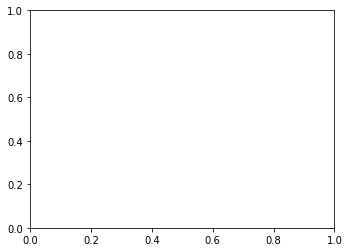

In [2]:
# 감성 분석 모델 학습 결과 확인
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'b-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7,1)
plt.legend()
plt.show()

In [71]:
# 테스트 데이터 평가
test_text_X = [row.split('\t')[1] for row in test_text.split('\n')[1:] if row.count('\t') > 0]
test_text_X = [clean_str(sentence) for sentence in test_text_X]
sentences = [sentence.split(' ') for sentence in test_text_X]
sentences_new = []
for sentence in sentences:
  sentence_new.append([word[:5] for word in sentence][:25])
sentences = sentences_new

test_X = tokenizer.texts_to_sequences(sentence)
test_X = pad_sequences(test_X, padding='post')

model.evaluate(test_X, test_Y, verbose=0)

ValueError: ignored

# 자연어
조선왕조실록 데이터로 

In [11]:
# 데이터 가져오기
path_to_file = tf.keras.utils.get_file('corpus.txt', 'https://raw.githubusercontent.com/greentec/greentec.github.io/master/public/other/data/chosundynasty/corpus.txt')

62013440/62012502 [==============================] - 1s 0us/step


In [12]:
# 데이터 로드 및 확인
train_text = open(path_to_file, 'rb').read().decode(encoding='utf-8')

print('Length of text : {} characters'.format(len(train_text)))
print()

print(train_text[:100])

Length of text : 26265493 characters

﻿태조 이성계 선대의 가계. 목조 이안사가 전주에서 삼척·의주를 거쳐 알동에 정착하다 
태조 강헌 지인 계운 성문 신무 대왕(太祖康獻至仁啓運聖文神武大王)의 성은 이씨(李氏)요, 휘


In [13]:
# 훈련 데이터의 입력(X) 정제
import re

def clean_str(string):
  string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]", " ", string)
  string = re.sub(r"\'s", " \'s", string)
  string = re.sub(r"\'ve", " \'ve", string)
  string = re.sub(r"n\'t", " n\'t" , string)
  string = re.sub(r"\'re", " \'re" , string)
  string = re.sub(r"\'d", " \'d" , string)
  string = re.sub(r"\'ll", " \'ll" , string)
  string = re.sub(r",", " , " , string)
  string = re.sub(r"!", " ! " , string)
  string = re.sub(r"\(", " \( " , string)
  string = re.sub(r"\)", " \) " , string)
  string = re.sub(r"\?", " \? " , string)
  string = re.sub(r"\s{2,}", " " , string)
  string = re.sub(r"\'{2,}", "\'" , string)
  string = re.sub(r"\'", "" , string)

  return string.lower()

train_text = train_text.split('\n')
train_text = [clean_str(sentence) for sentence in train_text]
train_text_X = []
for sentence in train_text:
  train_text_X.extend(sentence.split(' '))
  train_text_X.append('\n')

train_text_X = [word for word in train_text_X if word != '']

print(train_text_X[:20])

['태조', '이성계', '선대의', '가계', '목조', '이안사가', '전주에서', '삼척', '의주를', '거쳐', '알동에', '정착하다', '\n', '태조', '강헌', '지인', '계운', '성문', '신무', '대왕']


In [15]:
# 단어 토큰화
vocab = sorted(set(train_text_X))
vocab.append("UNK")
print('{} unique words'.format(len(vocab)))

word2idx = {u:i for i, u in enumerate(vocab)}
idx2word = np.array(vocab)

text_as_int = np.array([word2idx[c] for c in train_text_X])

print('{')
for word, _ in zip(word2idx, range(10)):
  print('  {:4s}: {:3d}, '.format(repr(word), word2idx[word]))
print(' ...\n}')

print('index of UNK: {}'.format(word2idx['UNK']))

332515 unique words
{
  '\n':   0, 
  '!' :   1, 
  ',' :   2, 
  '000명으로':   3, 
  '001':   4, 
  '002':   5, 
  '003':   6, 
  '004':   7, 
  '005':   8, 
  '006':   9, 
 ...
}
index of UNK: 332514


In [17]:
# 토큰 데이터 확인
print(train_text_X[:20])
print(text_as_int[:20])

['태조', '이성계', '선대의', '가계', '목조', '이안사가', '전주에서', '삼척', '의주를', '거쳐', '알동에', '정착하다', '\n', '태조', '강헌', '지인', '계운', '성문', '신무', '대왕']
[299181 229520 161349  17366 110944 230178 250960 154993 225348  28960
 190192 256005      0 299181  25557 273428  36069 163902 180371  84330]


In [30]:
# 기본 데이터세트 만들기
seq_length = 25
examples_per_epoch = len(text_as_int) // seq_length
sentence_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)
sentence_dataset = sentence_dataset.batch(seq_length+1, drop_remainder=True)
for item in sentence_dataset.take(1):
  print(idx2word[item.numpy()])
  print(item.numpy())

['태조' '이성계' '선대의' '가계' '목조' '이안사가' '전주에서' '삼척' '의주를' '거쳐' '알동에' '정착하다'
 '\n' '태조' '강헌' '지인' '계운' '성문' '신무' '대왕' '\\(' '\\)' '의' '성은' '이씨' '\\(']
[299181 229520 161349  17366 110944 230178 250960 154993 225348  28960
 190192 256005      0 299181  25557 273428  36069 163902 180371  84330
  17277  17278 224068 164455 230134  17277]


In [20]:
# 학습 데이터세트 만들기
def split_input_target(chunk):
  return [chunk[:-1], chunk[-1]]

train_dataset = sentence_dataset.map(split_input_target)
for x, y in train_dataset.take(1):
  print(idx2word[x.numpy()])
  print(x.numpy())
  print(idx2word[y.numpy()])
  print(y.numpy())

['태조' '이성계' '선대의' '가계' '목조' '이안사가' '전주에서' '삼척' '의주를' '거쳐' '알동에' '정착하다'
 '\n' '태조' '강헌' '지인' '계운' '성문' '신무' '대왕' '\\(' '\\)' '의' '성은' '이씨']
[299181 229520 161349  17366 110944 230178 250960 154993 225348  28960
 190192 256005      0 299181  25557 273428  36069 163902 180371  84330
  17277  17278 224068 164455 230134]
\(
17277


In [27]:
# 데이터 세트 shuffle, batch 설정
BATCH_SIZE = 128
steps_per_epoch = examples_per_epoch
BUFFER_SIZE = 10000

train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

In [28]:
# 단어 단위 생성 모델 정의
total_words = len(vocab)
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(total_words, 100, input_length=seq_length),
  tf.keras.layers.LSTM(units=100, return_sequences=True),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.LSTM(units=100),
  tf.keras.layers.Dense(total_words, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 100)           33251500  
_________________________________________________________________
lstm_2 (LSTM)                (None, 25, 100)           80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 25, 100)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_2 (Dense)              (None, 332515)            33584015  
Total params: 66,996,315
Trainable params: 66,996,315
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 단어 단위 생성 모델 학습
from tensorflow.keras.preprocessing.sequence import pad_sequences

def testmodel(epoch, logs):
  if epoch % 5 != 0 and epoch != 49:
    return
  test_sentence = train_text[0]

  next_words = 100
  for _ in range(next_words):
    test_text_X = test_sentence.split(' ')[-seq_length:]
    test_text_X = np.array([word2idx[c] if c in word2idx else word2idx['UNK'] for c in test_text_X])

    test_text_X = pad_sequences([test_text_X], maxlen=seq_length, padding='pre', value=word2idx['UNK'])

    output_idx = model.predict_classes(test_text_X)
    test_sentence += ' ' + idx2word[output_idx[0]]

  print()
  print(test_text_X)
  print()

testmodelcb = tf.keras.callbacks.LambdaCallback(on_epoch_end=testmodel)

history = model.fit(train_dataset.repeat(), epochs=50, steps_per_epoch=steps_per_epoch, callbacks=[testmodelcb], verbose=2)


Epoch 1/50
